In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn

from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [46]:
def notEmpty(s):
    return s != ''

In [47]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action='ignore',category=ConvergenceWarning)

In [48]:
## 加载数据
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再安装每行数据进行处理
fd = pd.read_csv(path, header=None)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = list(map(float, filter(notEmpty, d[0].split(' '))))
    data[i] = d

## 分割数据
x, y = np.split(data, (13,), axis=1)
y = y.ravel() # 转换格式

print("样本数据量:%d, 特征个数：%d" % x.shape)
print("target样本数据量:%d" % y.shape[0])

样本数据量:506, 特征个数：13
target样本数据量:506


In [49]:
## Pipeline常用于并行调参
models = [
    Pipeline([
        ('ss',StandardScaler()),
        ('poly',PolynomialFeatures()),
        ('linear',RidgeCV(alphas=np.logspace(-3,1,20)))
    ]),
    Pipeline([
        ('ss',StandardScaler()),
        ('poly',PolynomialFeatures()),
        ('linear',LassoCV(alphas=np.logspace(-3,1,20)))
    ])
]

# 参数
parameters = {
    "poly__degree":[3,2,1],
    "poly__interaction_only":[True,False],
    "poly__include_bias":[True,False],
    "linear__fit_intercept":[True,False]
}


In [50]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Ridge算法:最优参数: {'linear__fit_intercept': True, 'poly__degree': 3, 'poly__include_bias': False, 'poly__interaction_only': True}
Ridge算法:R值=0.832


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

LassoCV算法:最优参数: {'linear__fit_intercept': False, 'poly__degree': 4, 'poly__include_bias': True, 'poly__interaction_only': True}
LassoCV算法:R值=0.852


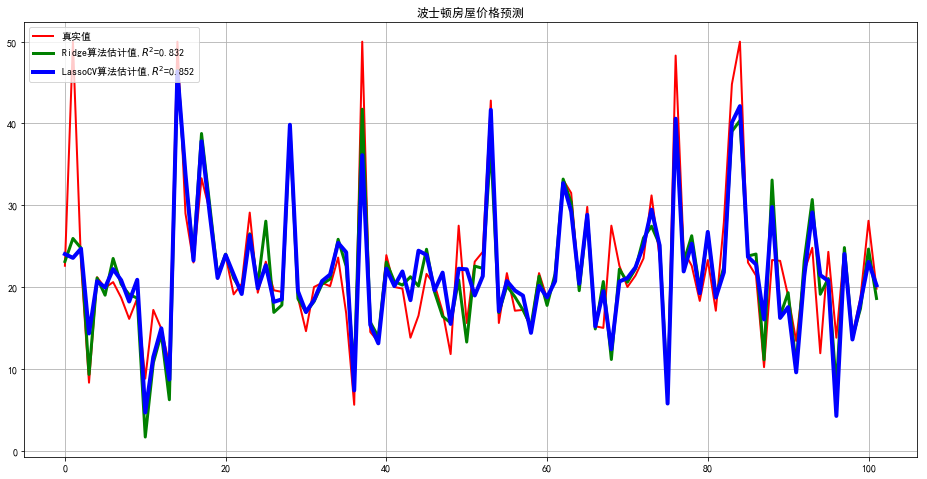

In [51]:
## Lasso和Ridge模型比较运行图表展示
titles = ['Ridge', 'LassoCV']
colors = ['g-','b-']
plt.figure(figsize=(16,8),facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2,label='真实值')
for t in range(2):
    # 获取模型并设置参数
    model = GridSearchCV(models[t], param_grid=parameters, n_jobs=1)
    # 模型训练
    model.fit(x_train, y_train)
    # 模型效果值获取(最优参数)
    
    print("%s算法:最优参数:" % titles[t],model.best_params_)
    print("%s算法:R值=%.3f" % (titles[t], model.best_score_))
    # 模型预测
    y_predict = model.predict(x_test)
    # 画图
    plt.plot(ln_x_test, y_predict, colors[t], lw = t + 3, label = '%s算法估计值,$R^2$=%.3f' % (titles[t],model.best_score_))

#图形显示
plt.legend(loc='upper left')
plt.grid(True)
plt.title("波士顿房屋价格预测")
plt.show()